# Final Project: Predicting Airplane Delays

***

### Name: Amna Saleem
### ID: u3137816
### Unit: Data Science Technology and Systems (11523)

***

# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Deployment of an ML-model simply means the integration of the model into an existing production environment which can take in an input and return an output that can be used in making practical business decisions. Machine learning solution can only add value the purpose it was built for if it fulfills the user needs it was built for and that can be gauged and assessed only once the ML solution is deployed, the model's predictions are available to users, developers or systems, so they can make business decisions based on data, interact with their application and so on. 

The process of taking a trained ML model and making its predictions available to users or other systems is known as deployment. Some of the key aspects of deployement include and revolve around the generated predictions, their availability & accessability (or the frequency of the generated predictions) and the storage of these predictions in a database. 

***************

### 2. Formulate the business problem, success metrics, and desired ML output.

#### Business Problem: 
In the last 10 years, according to the Bureau of Transportation Statistics (BTS) onyl 79.63% of flights performed on time. Averagely speaking, 720 million people were on board and 144 million of those were affected by flight delays caused by one of the major reasons being extreme weather: Significant meteorological conditions (actual or forecasted) that in the judgement of carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane. These series of delays cause a serious financial burden on airlines, also worth noting that this cost adds up to a considerable amount in a year by accounting for other lateral costs such as passenger cost and indirect effect on associated businesses. **The project requires to predict if a flight is going to be delayed or not delayed**.

##### Success Metrics:
The success of the modeling approach involves using traditional & popular machine learning Modelling techniques (classifiers) like Logistic Regression for prediction. This notebook contains sections for dataset exploration, data cleansing, deriving insights from visualizations (Confusion Matrix plot, ROC plot), training and evaluation of classification models, model interpretation. Confusion Matrix, Accuracy, Precision and Recall scores are a few success metrics that would be considered.

##### Desired ML Output:
By addressing the delayed flights problems, it is possible to reduce its heavy financial load on airlines, passengers and the GDP. The output of the ML model should be able to let the passengers know about the probability of a flight before booking and help book on a better date and time saving them time and money. Overall, the findings can provide a high profile achievement by addressing aviation delay problems with a robust prediction model to help save and time related to flight delays. This project is intended to establish a model to predict flight delays (by getting the best accuracy score) better than contemporary models.

********

### 3. Identify the type of ML problem you’re dealing with.

##### Type of ML Problem: 
This is a supervised machine learning problem as the predictions made are based on a set of examples provided.It is also binary classification. This problem has a set of historic data points which we want to use to predict the future in terms of delays in flights due to the weather conditions. 

*******

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [59]:
#!pip install pathlib2
#!pip install mlxtend
import os, os.path
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>
import zipfile
import glob
#import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [60]:
cwd = os.getcwd()
cwd

'C:\\Users\\amnao\\OneDrive - University of Canberra\\2022_Sem5\\DataSciTechSys\\Amna_u3137816_DSTS_Final'

In [61]:
os.path.relpath(cwd)

'.'

In [62]:
# download the files

# <note: make them all relative, absolute path is not accepted>

zip_path = glob.glob('./data_compressed/*.zip')
base_path = '.'
csv_base_path = './csv_base_path'

!mkdir csv_base_path

A subdirectory or file csv_base_path already exists.


In [63]:
#zip_path

In [64]:
# How many zip files do we have? write a code to answer it.

#lst = os.listdir(zip_path) # your directory path
number_files = len(zip_path)
print("Total number of files in the folder: ", number_files, 'zip-files')

Total number of files in the folder:  60 zip-files


#### Extract CSV files from ZIP files

In [65]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')


In [66]:
for file in zip_path:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip 
Extracting ./data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zi

In [67]:
# How many csv files have we extracted? write a code to answer it.
temp_data = glob.glob("./csv_base_path/*.csv") 
num_csv_files = len(temp_data)
print("Total number of files in the temp_data folder: ", num_csv_files, 'csv-files')

Total number of files in the temp_data folder:  60 csv-files


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [68]:
# from IPython.display import IFrame
from IPython.display import IFrame
# IFrame(src=os.path.relpath(f"{"./csv_base_path"}readme.html"), width=1000, height=600)

IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [69]:
# Displaying all files in CWD
print(os.listdir(os.getcwd()))

['.ipynb_checkpoints', 'combined_csv_v1.csv', 'combined_csv_v2.csv', 'combined_files.csv', 'csv_base_path', 'daily-summaries-2022-11-01T08-04-15.csv', 'data_compressed', 'final_project.pdf', 'marking_guide.pdf', 'oncloud.ipynb', 'onpremises.ipynb']


In [70]:
# pd.reset_option('^display.', silent=True)
df_temp = pd.read_csv(r"./csv_base_path/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv") # **ENTER YOUR CODE HERE**

df_temp

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0       2018        3      9           3          1  2018-09-03   
1       2018        3      9           9          7  2018-09-09   
2       2018        3      9          10          1  2018-09-10   
3       2018        3      9          13          4  2018-09-13   
4       2018        3      9          14          5  2018-09-14   
...      ...      ...    ...         ...        ...         ...   
585744  2018        3      9          11          2  2018-09-11   
585745  2018        3      9          11          2  2018-09-11   
585746  2018        3      9          11          2  2018-09-11   
585747  2018        3      9          11          2  2018-09-11   
585748  2018        3      9          11          2  2018-09-11   

       Reporting_Airline  DOT_ID_Reporting_Airline  \
0                     9E                     20363   
1                     9E                     20363   
2                     9E                     20363   
3                     9E                     20363   
4                     9E                     20363   
...                  ...                       ...   
585744                WN                     19393   
585745                WN                     19393   
585746                WN                     19393   
585747                WN                     19393   
585748                WN                     19393   

       IATA_CODE_Reporting_Airline Tail_Number  ...  Div4TailNum  Div5Airport  \
0                               9E      N908XJ  ...          NaN          NaN   
1                               9E      N315PQ  ...          NaN          NaN   
2                               9E      N582CA  ...          NaN          NaN   
3                               9E      N292PQ  ...          NaN          NaN   
4                               9E      N600LR  ...          NaN          NaN   
...                            ...         ...  ...          ...          ...   
585744                          WN      N923WN  ...          NaN          NaN   
585745                          WN      N7876A  ...          NaN          NaN   
585746                          WN      N271LV  ...          NaN          NaN   
585747                          WN      N265WN  ...          NaN          NaN   
585748                          WN      N7867A  ...          NaN          NaN   

        Div5AirportID  Div5AirportSeqID Div5WheelsOn Div5TotalGTime  \
0                 NaN               NaN          NaN            NaN   
1                 NaN               NaN          NaN            NaN   
2                 NaN               NaN          NaN            NaN   
3                 NaN               NaN          NaN            NaN   
4                 NaN               NaN          NaN            NaN   
...               ...               ...          ...            ...   
585744            NaN               NaN          NaN            NaN   
585745            NaN               NaN          NaN            NaN   
585746            NaN               NaN          NaN            NaN   
585747            NaN               NaN          NaN            NaN   
585748            NaN               NaN          NaN            NaN   

       Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0                   NaN            NaN         NaN           NaN  
1                   NaN            NaN         NaN           NaN  
2                   NaN            NaN         NaN           NaN  
3                   NaN            NaN         NaN           NaN  
4                   NaN            NaN         NaN           NaN  
...                 ...            ...         ...           ...  
585744              NaN            NaN         NaN           NaN  
585745              NaN            NaN         NaN           NaN  
585746              NaN            NaN         NaN           NaN  
585747              NaN            NaN         NaN        

**Question**: Print the row and column length in the dataset, and print the column names.

In [71]:
df_shape = df_temp.shape

print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [72]:
f10_rows = df_temp.head(10)

print("First 10 rows of the DataFrame:")
print(f10_rows)

First 10 rows of the DataFrame:
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0          

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [73]:
# View Column names
col_names = df_temp.columns

In [74]:
print(f'The column names are :', col_names)
print('#########')

# iterating the columns names

for col in df_temp.columns:
    print(col)

The column names are : Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       ...
       'Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
       'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff',
       'Div5TailNum', 'Unnamed: 109'],
      dtype='object', length=110)
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime


**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [75]:
# Enter your code here

Del_cols = [col for col in df_temp.columns if 'Del' in col]
#print(list(df_temp.columns))
print(Del_cols)

['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivArrDelay']


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [76]:
# to answer above questions, complete the following code

# print("The #rows and #columns are ", <CODE> , " and ", <CODE>)
print("1. The #rows and #columns are ", df_temp.shape[0] , " and ", df_temp.shape[1])

# print("The years in this dataset are: ", <CODE>)
print("2. The years in this dataset are: ", df_temp['Year'].unique().tolist())

# print("The months covered in this dataset are: ", <CODE>)
print("3. The months covered in this dataset are: ", df_temp['Month'].unique().tolist())

# print("The date range for data is :" , min(<CODE>), " to ", max(<CODE>))
print("4. The date range for data is :" , min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))

# print("The airlines covered in this dataset are: ", list(<CODE>))
print("5. The airlines covered in this dataset are: ", df_temp['Reporting_Airline'].unique().tolist())

1. The #rows and #columns are  585749  and  110
2. The years in this dataset are:  [2018]
3. The months covered in this dataset are:  [9]
4. The date range for data is : 2018-09-01  to  2018-09-30
5. The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']


In [77]:
df_temp['Origin']

# print("The Origin airports covered are: ", list(<CODE>))
print("6. The Origin airports covered are: ", df_temp['Origin'].unique().tolist())
print("Count unique Origins ",df_temp['Origin'].nunique())
df_temp['Origin'].value_counts()

6. The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ', 'MLI', 'BHM', 'IAD', 'CSG', 'CMH', 'MCO', 'MBS', 'FLL', 'SDF', 'TPA', 'MVY', 'LAS', 'LGB', 'SFO', 'SAN', 'LAX', 'RNO', 'PDX', 'ANC', 'ABQ', 'SLC', 'DEN', 'PHX', 'OAK', 'SMF', 'SJU', 'SEA', 'HOU', 'STX', 'BUR', 'SWF', 'SJC', 'DAB', 'BQN', 'PSE', 'ORH', 'HYA', 'STT', 'ONT', 'HRL', 'ICT', 'ISP', 'LBB', 'MAF', 'MDW', 'OKC', 'PN

ATL    31525
ORD    28257
DFW    22802
DEN    19807
CLT    19655
       ...  
PPG        8
OGD        8
HGR        8
STC        5
HYA        4
Name: Origin, Length: 346, dtype: int64

In [78]:
# print("The Destination airports covered are: ", list(<CODE>))
print("7. The Destination airports covered are: ", df_temp['Dest'].unique().tolist())
print("Count unique Destinations ",df_temp['Dest'].nunique())
df_temp['Dest'].value_counts()

7. The Destination airports covered are:  ['CVG', 'PWM', 'RDU', 'MSP', 'MSN', 'SHV', 'CLT', 'PIT', 'RIC', 'IAH', 'ATL', 'JFK', 'DCA', 'DTW', 'LGA', 'TYS', 'PVD', 'FNT', 'LIT', 'BUF', 'ORD', 'TRI', 'IND', 'BGR', 'AVP', 'BWI', 'LEX', 'BDL', 'GRR', 'CWA', 'TUL', 'MEM', 'AGS', 'EWR', 'MGM', 'PHL', 'SYR', 'OMA', 'STL', 'TVC', 'ORF', 'CLE', 'ABY', 'BOS', 'OAJ', 'TLH', 'BTR', 'SAT', 'JAX', 'BNA', 'CHO', 'VLD', 'ROC', 'DFW', 'GNV', 'ACK', 'PBI', 'CHS', 'GRB', 'MOT', 'MKE', 'DSM', 'ILM', 'GSO', 'MCI', 'SBN', 'BTV', 'MVY', 'XNA', 'RST', 'EVV', 'HPN', 'RSW', 'MDT', 'ROA', 'GSP', 'MCO', 'CSG', 'SAV', 'PHF', 'ALB', 'CHA', 'ABE', 'BMI', 'MSY', 'IAD', 'GTR', 'CID', 'CAK', 'ATW', 'AUS', 'BQK', 'MLI', 'CAE', 'CMH', 'AVL', 'MBS', 'FLL', 'SDF', 'TPA', 'LNK', 'SRQ', 'MHT', 'BHM', 'LAS', 'SFO', 'SAN', 'RNO', 'LGB', 'ANC', 'PDX', 'SJU', 'ABQ', 'SLC', 'DEN', 'LAX', 'PHX', 'OAK', 'SMF', 'SEA', 'STX', 'BUR', 'DAB', 'SJC', 'SWF', 'HOU', 'BQN', 'PSE', 'ORH', 'HYA', 'STT', 'ONT', 'DAL', 'ECP', 'ELP', 'HRL', 'MAF'

ATL    31521
ORD    28250
DFW    22795
DEN    19807
CLT    19654
       ...  
OGD        8
OWB        8
PPG        8
STC        5
HYA        4
Name: Dest, Length: 346, dtype: int64

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [79]:
# pd.set_option('display.max_rows', None)

counts = pd.DataFrame({'Origin':df_temp['Origin'].value_counts(),'Destination':df_temp['Dest'].value_counts()})
counts

Origin  Destination
ABE     303          303
ABI     169          169
ABQ    2077         2076
ABR      60           60
ABY      79           79
..      ...          ...
WRG      60           60
WYS      52           52
XNA    1004         1004
YAK      60           60
YUM      96           96

[346 rows x 2 columns]

**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [80]:
counts.sort_values(by=['Origin', 'Destination'],ascending=False).head(15)

Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877

**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

###### Answer
We can compare and see discrepency for a few Origins and Destinations, where Destination is less than Origin counts and vice-versa. It could mean that the flight departed but was diverted to another destination but it is not enough information to predict delays efficiently. 
Hence, not really the flight trip delay could not be predicted using the given information, as no analysis or data exploration is done on the 'delay related variables'. 
***

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an idea if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [81]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df = pd.DataFrame()
    
    for filename in csv_files:
        # reading content of csv file
        csv_df = pd.read_csv(filename)
        #content.append(df)
        
        # filter columns 
        filter_df = csv_df[filter_cols]
        
        # subset columns based on values
        df_subset = filter_df[filter_df[subset_cols[0]].isin(subset_vals[0]) & filter_df[subset_cols[1]].isin(subset_vals[1])]
        
        # subset values based on 'Reporting_Airlines' 
        df_subset = df_subset[df_subset[subset_cols[2]].isin(subset_vals[2])]
        
        # concatenate the dataframe (empty)
        df = pd.concat([df, df_subset], ignore_index = True)
        
        # Save the database as CSV
        df.to_csv(file_name, index=False)
              
    
#####################    

In [82]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [83]:
start = time.time()

combined_csv_filename = f"{base_path}/combined_files.csv"

# code to call the combined_csv function
combine_csv(temp_data,cols,subset_cols,subset_vals,combined_csv_filename)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

csv's merged in 12.34 minutes


#### Load dataset

Load the combined dataset.

In [84]:
# Enter your code here to read the combined csv file.
data = pd.read_csv(combined_csv_filename)

Print the first 5 records.

In [85]:
data.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    ATL          GA  IAH        TX        2145        0.0       0.0   
1    DFW          TX  ATL        GA         945        0.0       0.0   
2    ATL          GA  DEN        CO        1855        0.0       0.0   
3    ATL          GA  PHX        AZ        1634        0.0       0.0   
4    PHX          AZ  ATL        GA         700        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  ArrDel15  AirTime  
0     689.0              3     -20.0              0.0       0.0     99.0  
1     731.0              3      -3.0              0.0       0.0     98.0  
2    1199.0              5      -7.0              0.0       0.0    174.0  
3    1587.0              7      -4.0              0.0       0.0    233.0  
4    1587.0              7     -13.0              0.0       0.0    179.0

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

##### to answer above questions, complete the following code

In [86]:
#print("The #rows and #columns are ", <CODE> , " and ", <CODE>)
print("1. The #rows and #columns are ", data.shape[0] , " and ", data.shape[1])

#print("The years in this dataset are: ", list(<CODE>))
print("2. The years in this dataset are: ", data['Year'].unique().tolist())

#print("The months covered in this dataset are: ", sorted(list(<CODE>)))
print("3. The months covered in this dataset are: ", sorted(data['Month'].unique().tolist()))

#print("The date range for data is :" , min(<CODE>), " to ", max(<CODE>))
print("4. The date range for data is :" , min(data['FlightDate']), " to ", max(data['FlightDate']))

#print("The airlines covered in this dataset are: ", list(<CODE>))
print("5. The airlines covered in this dataset are: ", data['Reporting_Airline'].unique().tolist())

#print("The Origin airports covered are: ", list(<CODE>))
print("6. The Origin airports covered are: ", data['Origin'].unique().tolist())

#print("The Destination airports covered are: ", list(<CODE>))
print("7. The Destination airports covered are: ", data['Dest'].unique().tolist())

1. The #rows and #columns are  1658130  and  20
2. The years in this dataset are:  [2014, 2015, 2016, 2017, 2018]
3. The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
4. The date range for data is : 2014-01-01  to  2018-12-31
5. The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
6. The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
7. The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [87]:
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True) 

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [88]:
# Enter your code here
data.isnull().sum()

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [89]:
### Remove null columns
data = data.dropna()

Get the hour of the day in 24-hour time format from CRSDepTime.

In [90]:
#data['DepHourofDay'] = # Enter your code here
data['DepHourofDay'] = (data['CRSDepTime']//100)
data['DepHourofDay'] 

0          21
1           9
2          18
3          16
4           7
           ..
1658125    11
1658126     8
1658127    12
1658128    22
1658129    16
Name: DepHourofDay, Length: 1635590, dtype: int64

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

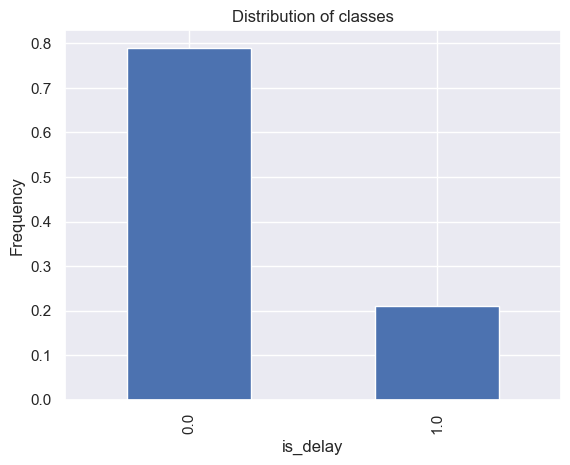

In [91]:
(data.groupby('is_delay').size()/len(data) ).plot(kind='bar')# Enter your code here
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

###### Answer
From the above bar plot it can be easily deduced that there are around 21% delays and around 79% of flights are on time. The ratio is 4:1 meaning flights on time are 4 times more than delayed flights.  

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

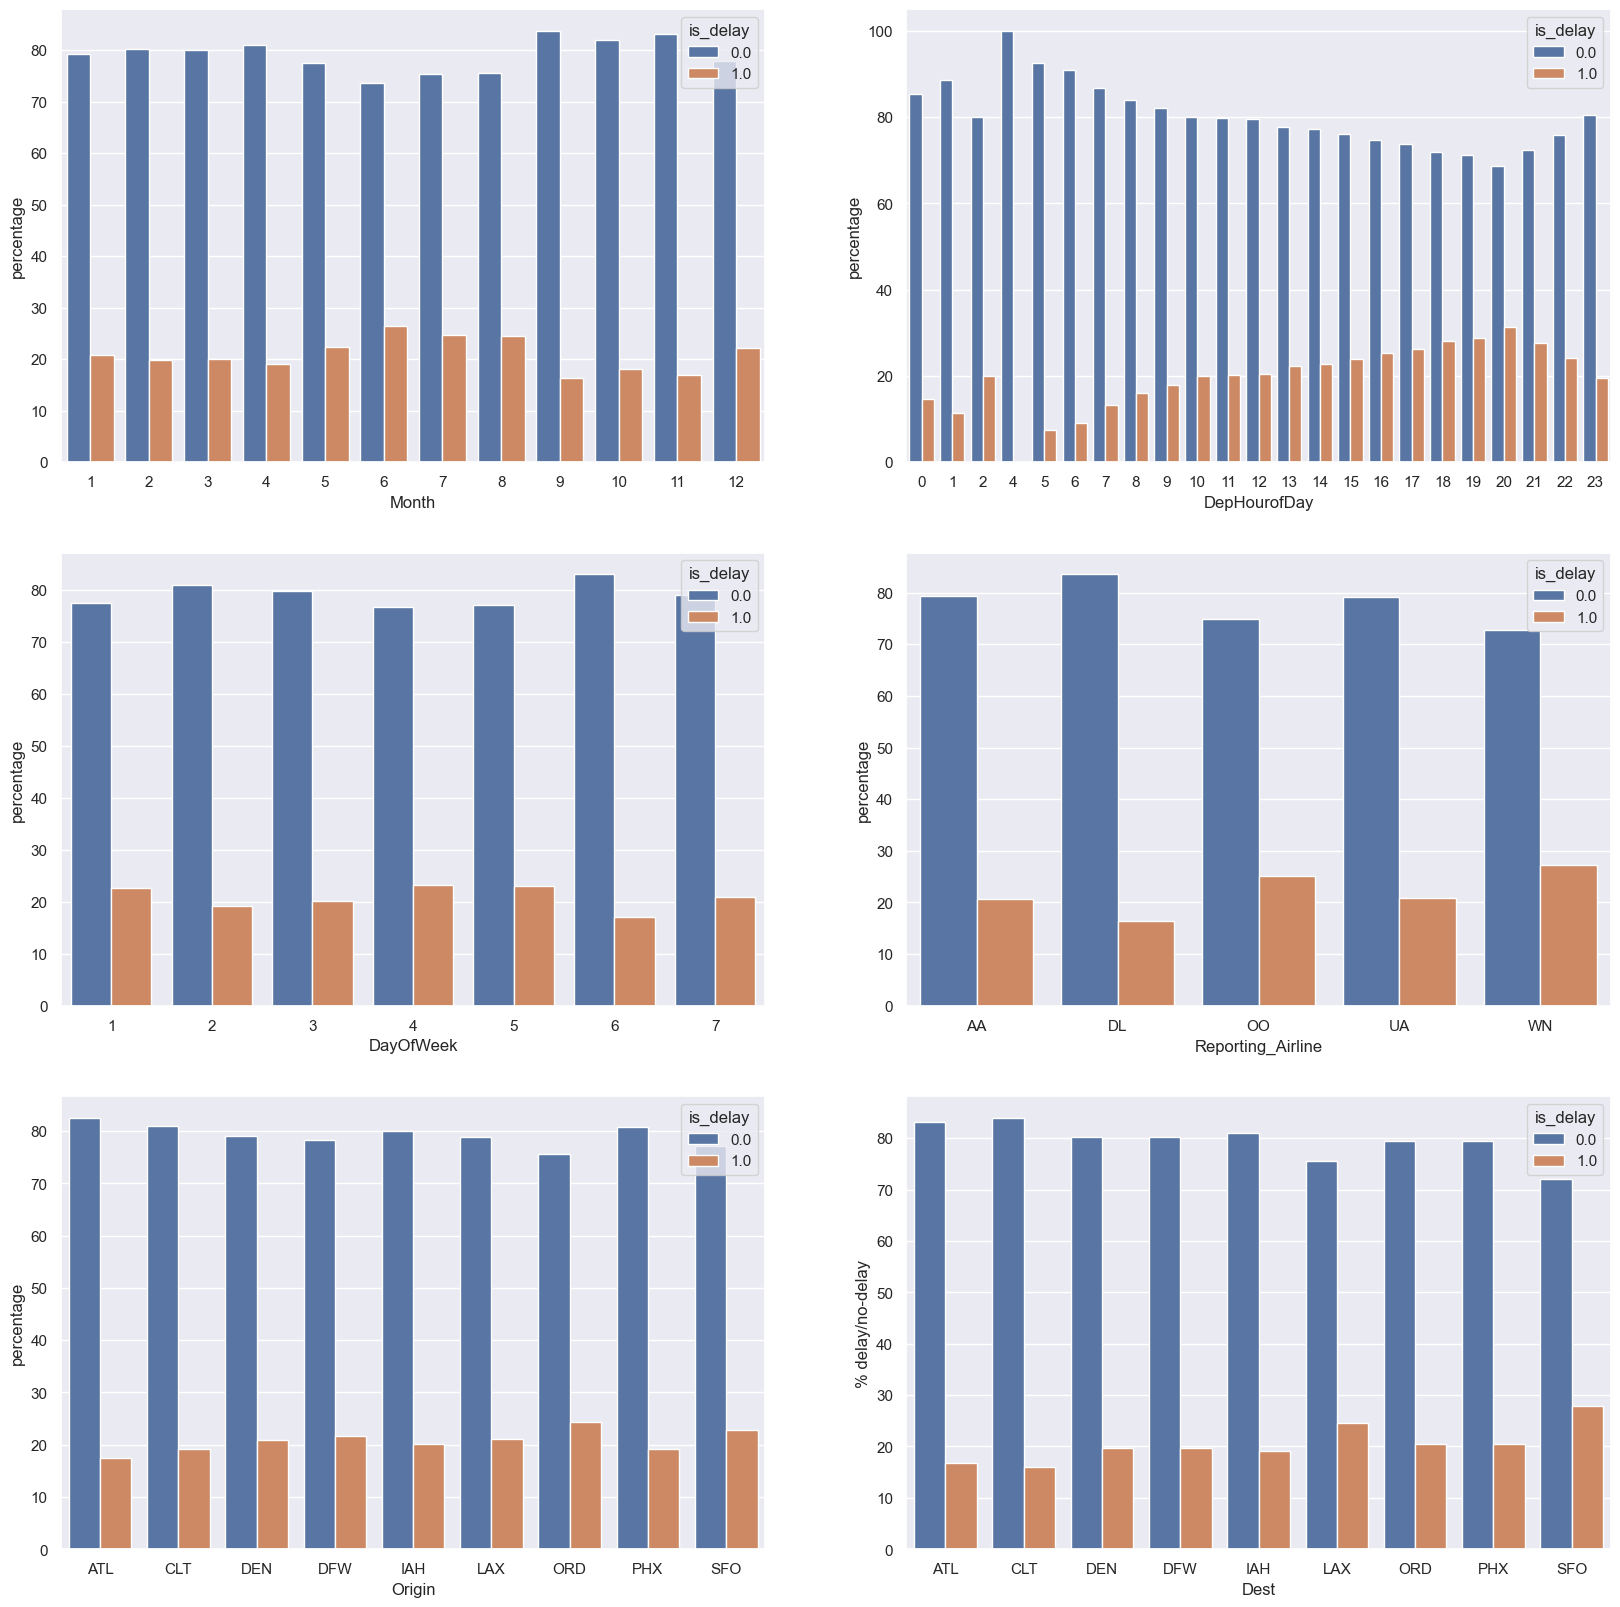

In [92]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

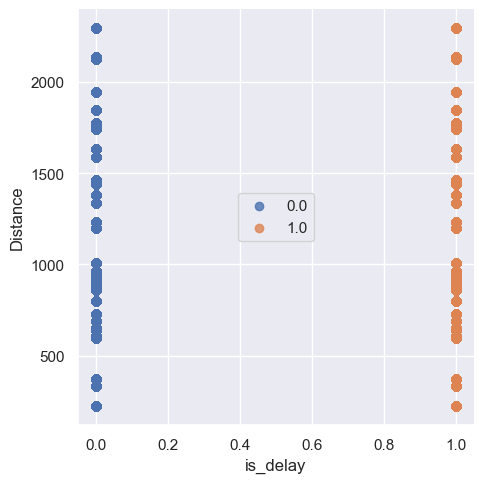

In [93]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

##### Answers:

- **June** has the most delays, more than 25% followed by July and August with around 25% of delays. 

- The bar plot depicts at around **8pm or 20:00hrs** most delays are experienced.

- Taking Monday as the first day of the week, **Mondays(1), Thursday(4) and Fridays(5)** experience the most delays.

- We can deduce from the bar plot that the airline (Reporting Airline) **WN** experiences the most delays.

- The Origin airport **ORD** (O'Hare International Airport) and Destination airport **SFO** (San Francisco International Airport) experiences most delays according to the bar graphs

- According to the plot, distance does not impact flight delays.

### Features

Look at all the columns and what their specific types are.

In [94]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [95]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [96]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [97]:
data.dtypes

is_delay              float64
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
DepHourofDay         category
dtype: object

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [98]:
data.isnull().sum()

is_delay             0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
Reporting_Airline    0
Origin               0
Dest                 0
Distance             0
DepHourofDay         0
dtype: int64

In [99]:
categorical_columns[0:7]

['Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Reporting_Airline',
 'Origin',
 'Dest']

In [100]:
data_dummies = pd.get_dummies(data[['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']], drop_first=True) # Enter your code here
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis = 1, inplace=True)

In [101]:
#data_dummies

Check the length of the dataset and the new columnms.

In [102]:
# Enter your code here
#len(data)
data.shape

(1635590, 72)

In [103]:
# Enter your code here
data.columns

Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [104]:
data.rename(columns = {'is_delay':'target'}, inplace=True )

In [105]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
data.to_csv("combined_csv_v1.csv", encoding= 'utf-8', index= False)

In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data["Distance"] = scaler.fit_transform(data["Distance"].values.reshape(-1,1))
#data

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [107]:
# write Code here to split data into train and test
y = data['target']
X  = data.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

### Baseline classification model

In [108]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.79


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [109]:
#from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Function to plot Confusion Matrix:
   
def plot_confusion(test_labels, target_predicted):
    
    confusion_mat = confusion_matrix(test_labels, target_predicted)
    print(confusion_mat)
    
    fig, ax = plot_confusion_matrix(confusion_mat, figsize=(6, 6), cmap=plt.cm.Oranges)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    

In [110]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC
def plot_roc(test_labels, target_predicted):
    
    fpr, tpr, _ = metrics.roc_curve(test_labels,  target_predicted)
    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

In [111]:
# Enter you code here
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[258115      0]
 [ 69003      0]]
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258115
         1.0       0.00      0.00      0.00     69003

    accuracy                           0.79    327118
   macro avg       0.39      0.50      0.44    327118
weighted avg       0.62      0.79      0.70    327118



[[258115      0]
 [ 69003      0]]


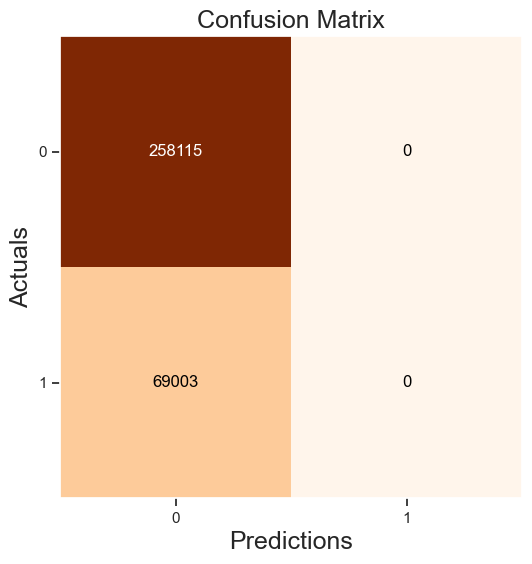

In [112]:
# Calling the confusion matrix plot function
 
plot_confusion(y_test, y_pred) 

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

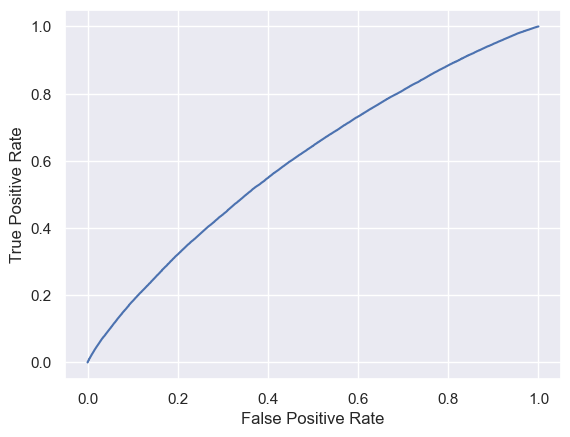

In [113]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

#plot ROC curve
plot_roc(y_test,y_pred_proba)

In [114]:
# Enter you code here

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

classification_models = {}

classification_models['Logistic_Regression'] = LogisticRegression()

# declare empty dictionaries
accuracy, precision, recall = {}, {}, {}
# for loop for looping through all the classifications models and storing them in a data dictionary
for key in classification_models.keys():
    
    # Fit the classifier
    classification_models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = classification_models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    
# confusion matrix
classificationmodel_df = pd.DataFrame(index = classification_models.keys(), 
                                      columns = ['Accuracy', 'Precision', 'Recall'])
classificationmodel_df['Accuracy'] = accuracy.values()
classificationmodel_df['Precision'] = precision.values()
classificationmodel_df['Recall'] = recall.values()
classificationmodel_df

Precision: 0.000
Recall: 0.000
Accuracy: 0.789
F1 Score: 0.000


Accuracy  Precision  Recall
Logistic_Regression  0.789058        0.0     0.0

### Key questions to consider:

**Question**: What can you summarize from the confusion matrix?

**Answer**: From the confusion matrix we can see that the total correct positive values (TP+FN) i.e.327,118 out of which the correctly predicted values are 258,115 (on-time flights) and the rest being false negative (FN) are 69,003 that is actually actually on time but predicted as delayed flights.From above performance metrics, we can see that the accuracy of predicting delay in flight is around 79%.  

However, the incorrectly predicted positive values (FP) and the correctly predicted negative values (TN) are 0. Which means we did not get any results for which flights were actually delayed but classified as being on time and which flights were actually delayed and classified as delayed respectively. This could also mean the model is overfitting.

### Questions:

1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

###### Answers:

1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison?

The model may be over fitting


2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences?

Yes, where the accuracy is 79%, there are no outcome values for precision and recall. It could be because the model is not complex enough. Where the Precision and Recall both become 0, and F1-score cannot be calculated (division by 0). Such cases can be scored as F1-score = 0, or generally marking the classifier as useless. 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)?

Looking at the results, and success metrics we get no conrete information about the target variable whether the flight would be delayed or not. We could perform feature engineering, try to balance the two classes delay and no delay, bring in more data as the data may not be sufficient to come up with an efficient model and apply some feature reduction techniques. 

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [2]:
### Provide a link for your Gitlab repository here

https://gitlab.com/amnasaleem/dsts-final-project.git

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [130]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14 + holidays_15 + holidays_16 + holidays_17 + holidays_18

# ### Add indicator variable for holidays
# data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays).astype(int)

In [131]:
# function to identify holidays
def identified_holidays(row):
    if row["FlightDate"] in holidays:
        return 1
    else:
        return 0

In [132]:
data_orig['is_holiday'] = data_orig.apply(lambda row:identified_holidays(row), axis=1)

In [133]:
data_orig['is_holiday']
data_orig['is_holiday'].value_counts()

0    1591678
1      43912
Name: is_holiday, dtype: int64

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [134]:
# download data from the link above and place it into the data folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [135]:
weather = pd.read_csv('daily-summaries-2022-11-01T08-04-15.csv') # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

In [136]:
### Map weather stations to airport code
station_map = {station[x]: airports[x] for x in range(len(station))}
weather['airport'] = weather["STATION"].map(station_map)

Create another column called `MONTH` from the `DATE` column.

In [137]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1]) # Enter your code here 
weather.head()

STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0   

  airport MONTH  
0     LAX    01  
1     LAX    01  
2     LAX    01  
3     LAX    01  
4     LAX    01

### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [138]:
# checking missing values
weather.isna().sum()

STATION       0
DATE          0
AWND          0
PRCP          0
SNOW       5478
SNWD       5478
TAVG         62
TMAX         20
TMIN         20
airport       0
MONTH         0
dtype: int64

In [139]:
# imputing mean to handle missing values
weather.SNOW.fillna(weather["SNOW"].mean(), inplace=True)# Enter your code here
weather.SNWD.fillna(weather["SNWD"].mean(), inplace=True)# Enter your code here
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [140]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = weather[weather['TAVG'].isnull()].index.to_numpy() # Enter your code here 
TMAX_idx = weather[weather['TMAX'].isnull()].index.to_numpy() # Enter your code here 
TMIN_idx = weather[weather['TMAX'].isnull()].index.to_numpy() # Enter your code here 
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420],
      dtype=int64)

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [141]:
weather_impute = weather.groupby(['MONTH', 'STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head()

MONTH      STATION        TAVG        TMAX       TMIN
0    01  USW00003017   -2.741935   74.000000 -69.858065
1    01  USW00003927   79.529032  143.767742  20.696774
2    01  USW00012960  110.535484  170.438710  52.425806
3    01  USW00013874   59.070968  114.600000   8.161290
4    01  USW00013881   48.929032  106.529032 -15.645161

Merge the mean data with the weather data.

In [142]:
# get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [143]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [144]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

In [145]:
# Check columns
weather.columns

Index(['DATE', 'AWND', 'PRCP', 'SNOW', 'TAVG', 'airport'], dtype='object')

Add the origin and destination weather conditions to the dataset.

In [146]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [147]:
sum(data.isna().any())

0

In [148]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [149]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [150]:
#data_dummies = # Enter your code here
###################################
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_holiday')
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [151]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'is_holiday', 'AWND_O',
       'PRCP_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2',
       'Quarter_3', 'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12', 'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4',
       'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8',
       'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12',
       'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16',
       'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20',
       'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24',
       'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28',
       'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOf

In [152]:
print(data.columns.tolist())

['is_delay', 'Distance', 'DepHourofDay', 'is_holiday', 'AWND_O', 'PRCP_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [153]:
data.rename(columns = {'is_delay':'target'}, inplace=True ) # Enter your code here

In [154]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B
data.to_csv("combined_csv_v2.csv", encoding='utf-8', index=False)


Create the training and testing sets again.

In [155]:
# Enter your code here

y = data['target']
X  = data.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=201)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [156]:
# Instantiate another logistic regression model
 
classifier2 = LogisticRegression()
classifier2.fit(X_train,y_train)

# Predicting the test set results and calculating the accuracy
y_pred = classifier2.predict(X_test)
print('Accuracy of logistic regression classifier2 on test set: {:.2f}'.format(classifier2.score(X_test, y_test)))


Accuracy of logistic regression classifier2 on test set: 0.79


In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88    258332
         1.0       0.45      0.03      0.06     68786

    accuracy                           0.79    327118
   macro avg       0.62      0.51      0.47    327118
weighted avg       0.72      0.79      0.71    327118



[[255681   2651]
 [ 66641   2145]]


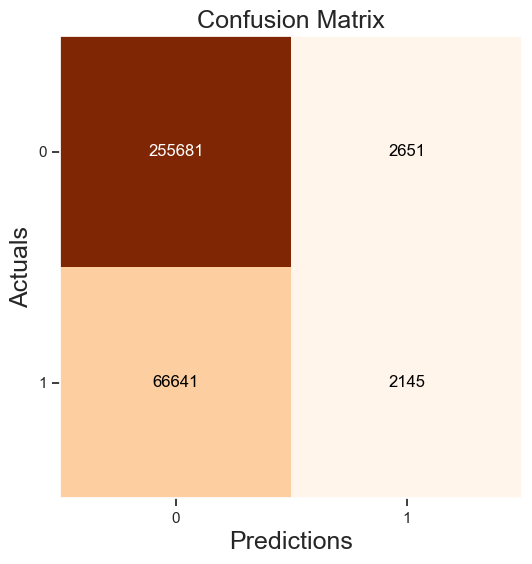

In [158]:
# Enter your code here
plot_confusion(y_test, y_pred) 

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

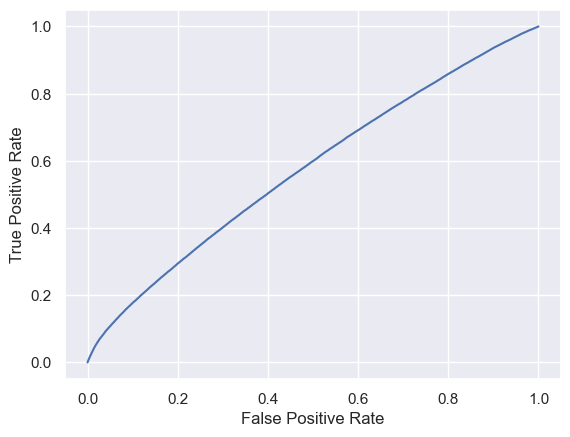

In [159]:
y_pred_proba = classifier2.predict_proba(X_test)[::,1]

#plot ROC curve
plot_roc(y_test,y_pred_proba)

Question: did you notice a difference by adding the extra data on the results?

###### Answer: 
The confusion matrix shows FP and TN but this does not bring any change in the accuracy of the model, being the same 79%.
The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
The ROC curve got flatter as seen above which is not an indication of a good model, the accuracy however remained the same. The curve also depicts that no corelation exists. 


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [117]:
# copy the link here
# https://public.tableau.com/authoring/Final_Tableau_16673190880370/Dashboard1#1

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

# Answers

##### 1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
The performance results of the models does not efficiently predict the required output in terms of whether the flight would be delayed or not. Given extra time I would like to try out different classification model, add in more relevant data and perform some hyperparameter tuning to optimized the model and improve the success metrics.
***
##### 2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
Adding in more data, performing some feature engineering such as hot-on-encoding and feature dimensionality reduction helped come up with better results to an extent but overall it did not make a huge model improvement impact as the model accuracy remained the same 79%.
***
##### 3. What were some of the biggest challenges you encountered throughout this project?
Some of the challenges faced during this project were:
- Extracting the csv files through the relevant paths. It was time-cosuming as I had to experiment a lot and research a lot;
- Learning a new domain (airlines) and understanding the data initially, even though it got better with project progression;
- Understanding, fixing or completing someone else's code is always challenging and time consuming; and
- Completion of the project within time as there are endless possibilities of data exploration and making the model better.
***
##### 4. What were the three most important things you learned about machine learning while completing this project?
For this project I learnt that:
 - Data cleaning for ML is key, choosing the right features and parameters is important for an the models accuracy;
 - ML get help us extract/ gain insights that are otherwise hidden and hard to get within the large available data; and  
 - Lastly, there is always room for improvement and more data enriches the required results.
 ***